In [52]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt


## Feature Extraction

In [54]:
# Upload the CSV file 
df = pd.read_csv('stock_data1.csv')

In [56]:
# Check the first few rows of the dataframe to ensure it's loaded properly
df.head()

,Unnamed: 0,title,author,score,upvotes,url,created_at,comments,sentiment_label,stemmed_content
0,0,Zeta global short attack,Woznyyyy,1,1,https://www.reddit.com/r/stocks/comments/1gx8x...,2024-11-22 14:22:24,0,Negative,zeta global short attack
1,1,C3AI begins to turn the tide,pregizex,7,7,https://www.reddit.com/r/stocks/comments/1gx8r...,2024-11-22 14:13:30,5,Neutral,c ai begin turn tide
2,2,Thoughts on building a 10Y high risk portfolio,Ok_Criticism_558,1,1,https://www.reddit.com/r/stocks/comments/1gx83...,2024-11-22 13:40:58,5,Negative,thought build high risk portfolio
3,3,Thoughts and dilemma on Rocket Lab?,starlordbg,4,4,https://www.reddit.com/r/stocks/comments/1gx7o...,2024-11-22 13:20:19,46,Negative,thought dilemma rocket lab
4,4,What I learnt from MSTR frenzy,bsplondon,95,95,https://www.reddit.com/r/stocks/comments/1gx4x...,2024-11-22 10:35:09,44,Positive,learnt mstr frenzi


In [58]:
# Initialize the TF-IDF vectorizer
vectorizer = TfidfVectorizer()

In [60]:
# Apply TF-IDF transformation on the 'stemmed_content' column
X = vectorizer.fit_transform(df['stemmed_content'])  # This will convert text into numerical features


In [62]:
# Encode the sentiment labels (if not already encoded)
df['sentiment_label_encoded'] = df['sentiment_label'].map({'Negative': 0, 'Neutral': 1, 'Positive': 2})


In [64]:
# Define the target variable
y = df['sentiment_label_encoded']  # Target variable

In [66]:
# Now, `X` contains the numerical features (TF-IDF vectors), and `y` contains the encoded sentiment labels.
print("Feature matrix (X):")
print(X.toarray())  # Show the numerical feature matrix
print("\nTarget labels (y):")
print(y)  # Show the encoded sentiment labels


Feature matrix (X):
[[0.         0.         0.         ... 0.         0.         0.56521652]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]

Target labels (y):
0      0
1      1
2      0
3      0
4      2
      ..
828    2
829    0
830    2
831    0
832    2
Name: sentiment_label_encoded, Length: 833, dtype: int64


## Train the Model

In [68]:
# splitting the data to training data  and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [70]:
model=LogisticRegression(max_iter=1000)


In [72]:
model.fit(X_train,y_train)


LogisticRegression(max_iter=1000)

## Model Evaluation

In [74]:
# accuracy score on the trainning data
x_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(y_train,x_train_prediction)

In [76]:
# accuracy score on the test data
x_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(y_test,x_test_prediction)

In [78]:
#Calculate Precision, Recall, and F1-Score
precision = precision_score(y_test, x_test_prediction, average='weighted') 
recall = recall_score(y_test, x_test_prediction, average='weighted')  
f1 = f1_score(y_test, x_test_prediction, average='weighted')


In [80]:

# Display the results
print("training data accuracy:",training_data_accuracy)
print("test data accuracy:", test_data_accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:",f1)

training data accuracy: 0.7957957957957958
test data accuracy: 0.6407185628742516
Precision: 0.6324898589916941
Recall: 0.6407185628742516
F1-Score: 0.5476542845487821


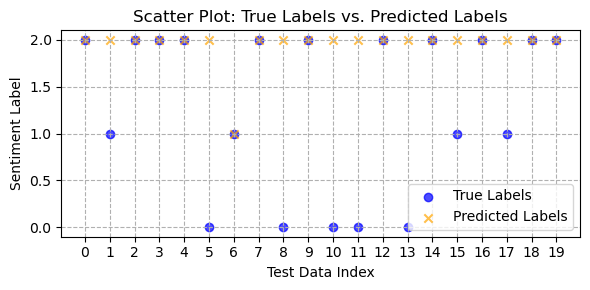

In [94]:
# Ensure X_test is converted to a dense array if needed
if not isinstance(X_test, np.ndarray):
    indices = np.arange(X_test.shape[0])[:20]  # Use the number of rows in the sparse matrix
else:
    indices = np.arange(len(X_test))[:20]  # If already a dense array, proceed as before

# Use only the first 20 samples
y_test_subset = y_test[:20]
x_test_prediction_subset = x_test_prediction[:20]

# Create scatter plot
plt.figure(figsize=(6, 3))
plt.scatter(indices, y_test_subset, color='blue', label='True Labels', alpha=0.7)
plt.scatter(indices, x_test_prediction_subset, color='orange', label='Predicted Labels', alpha=0.7, marker='x')

# Add labels, title, and legend
plt.xlabel("Test Data Index")
plt.ylabel("Sentiment Label")
plt.title("Scatter Plot: True Labels vs. Predicted Labels")
plt.xticks(indices)
plt.legend()

# Show the plot
plt.grid(True, linestyle='--', alpha=1)
plt.tight_layout()
plt.show()



## Saving The Trained Model

In [36]:
 import pickle

In [44]:
# Saving The Model 
filename="trained_model.sav"
pickle.dump(model,open( filename , 'wb'))

In [42]:
#Loading The Saved Model
loaded_model=pickle.load(open("trained_model.sav", 'rb'))
